In [22]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
)
from ripple_heterogeneity.readout import assembly_multi_region_ind_detect_reactivation
from ripple_heterogeneity.assembly import assembly_reactivation, find_sig_assembly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
from statannotations.Annotator import Annotator

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [8]:
df_sessions = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
sessions_to_skip = [r"Z:\Data\AYAold\AYA10\day12"]
df_sessions = df_sessions[~np.in1d(df_sessions.basepath,sessions_to_skip)]


In [29]:
# basepath = r"Z:\Data\FujisawaS\EE\EE0627fm"
# assembly_react = assembly_reactivation.AssemblyReact(
#     basepath=basepath,
# )
# assembly_react.load_data()
# assembly_react.restrict_epochs_to_pre_task_post()
# assembly_react.get_weights(epoch=assembly_react.epochs[1])
# assembly_react.plot()
# plt.show()

In [ ]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_ind_detect_reactivation_v1"

batch_analysis.run(
    df_sessions,
    save_path,
    assembly_multi_region_ind_detect_reactivation.run,
    parallel=False,
    verbose=True,
    num_cores=12
)

## load in results

In [157]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_ind_detect_reactivation_v1"

results_df, peth = assembly_multi_region_ind_detect_reactivation.load_results(save_path)

### add other metrics

In [158]:
peth_zscore = (peth - np.nanmean(peth,axis=0)) / np.nanstd(peth,axis=0)

results_df["response_50ms"] = peth[(peth.index > 0) & (peth.index < 0.05)].mean(axis=0).values
results_df["response_50ms_peak"] = peth[(peth.index > 0) & (peth.index < 0.05)].max(axis=0).values

results_df["response_50ms_zscore"] = peth_zscore[(peth_zscore.index > 0) & (peth_zscore.index < 0.05)].mean(axis=0).values
results_df["response_50ms_peak_zscore"] = peth_zscore[(peth_zscore.index > 0) & (peth_zscore.index < 0.05)].max(axis=0).values

C:\Users\Cornell\AppData\Local\Temp\ipykernel_26088\2651960936.py:1: RuntimeWarning: Mean of empty slice
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.


### normalize cross region labels

In [159]:
results_df.cross_region_label = results_df.cross_region_label.replace("Deep_EC1|EC2|EC3|EC4|EC5|MEC","CA1deep-MEC")
results_df.cross_region_label = results_df.cross_region_label.replace("Superficial_EC1|EC2|EC3|EC4|EC5|MEC","CA1sup-MEC")
results_df.cross_region_label = results_df.cross_region_label.replace("Deep_PFC","CA1deep-PFC")
results_df.cross_region_label = results_df.cross_region_label.replace("Superficial_PFC","CA1sup-PFC")
results_df.cross_region_label.unique()

array(['CA1sup-MEC', 'CA1deep-MEC', 'CA1deep-PFC', 'CA1sup-PFC'],
      dtype=object)

In [160]:
results_df

,response,assembly_n,epoch,deepSuperficial,cross_region_label,n_ca1,n_cortex,n_ca1_total,n_cortex_total,n_cells_total,basepath,response_50ms,response_50ms_peak,response_50ms_zscore,response_50ms_peak_zscore
0,0.083057,0,pre,Superficial,CA1sup-MEC,1,3,1,10,11,Z:\Data\AYAold\AYA7\day19,0.131824,0.196796,2.828127,4.574413
1,-0.026461,0,post,Superficial,CA1sup-MEC,1,3,1,10,11,Z:\Data\AYAold\AYA7\day19,-0.008467,-0.000896,-0.259120,-0.185338
2,-0.058819,0,pre,Deep,CA1deep-MEC,1,4,18,38,56,Z:\Data\AYAold\AYA7\day20,-0.085686,-0.017077,-1.705395,-0.098870
3,0.107454,0,post,Deep,CA1deep-MEC,1,4,18,38,56,Z:\Data\AYAold\AYA7\day20,0.131375,0.219917,1.183898,2.385367
4,0.115712,0,pre,Deep,CA1deep-MEC,2,14,19,50,69,Z:\Data\AYAold\AYA7\day24,0.127620,0.210349,0.676802,2.416339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,-0.383753,1,pre,Deep,CA1deep-PFC,3,6,14,16,30,Z:\Data\ORproject\OR18\day2,-0.680181,-0.249107,-3.590849,-0.721278
920,0.503076,0,post,Deep,CA1deep-PFC,2,2,14,16,30,Z:\Data\ORproject\OR18\day2,0.857009,1.258494,3.918136,6.042820
921,0.145846,1,post,Deep,CA1deep-PFC,3,6,14,16,30,Z:\Data\ORproject\OR18\day2,0.253120,0.328100,2.908530,3.898354
922,0.223385,0,pre,Superficial,CA1sup-PFC,1,3,3,16,19,Z:\Data\ORproject\OR18\day2,0.439219,0.711374,3.249140,5.642825


In [161]:
results_df.basepath.value_counts()


Z:\Data\HMC1\day10               100
Z:\Data\HMC1\day13               100
Z:\Data\HMC1\day9                 74
Z:\Data\HMC1\day12                74
Z:\Data\HMC1\day14                70
Z:\Data\HMC1\day8                 62
Z:\Data\FujisawaS\EE\EE0706fm     42
Z:\Data\FujisawaS\EE\EE0705fm     36
Z:\Data\FujisawaS\EE\EE0627fm     32
Z:\Data\FujisawaS\EE\EE0622fm     24
Z:\Data\FujisawaS\EE\EE0708fm     18
Z:\Data\HMC2\day9                 16
Z:\Data\Kenji\ec016.577_590       16
Z:\Data\HMC2\day6                 14
Z:\Data\HMC2\day4                 12
Z:\Data\AYAold\AYA9\day17         12
Z:\Data\AYAold\AYA9\day16         12
Z:\Data\Kenji\ec014.271_287       12
Z:\Data\Kenji\ec014.207_234       10
Z:\Data\HMC2\day7                 10
Z:\Data\Kenji\ec013.656_674       10
Z:\Data\Kenji\ec016.425_437       10
Z:\Data\AYAold\AYA9\day12         10
Z:\Data\AYAold\AYA7\day24          8
Z:\Data\Kenji\ec016.532_540        8
Z:\Data\Kenji\ec014.133_141        8
Z:\Data\Kenji\ec014.329_340        6
Z

In [162]:
results_df.query("basepath.str.contains('HMC2')").basepath.value_counts()

Z:\Data\HMC2\day9     16
Z:\Data\HMC2\day6     14
Z:\Data\HMC2\day4     12
Z:\Data\HMC2\day7     10
Z:\Data\HMC2\day8      6
Z:\Data\HMC2\day11     4
Z:\Data\HMC2\day3      4
Name: basepath, dtype: int64

<AxesSubplot: >

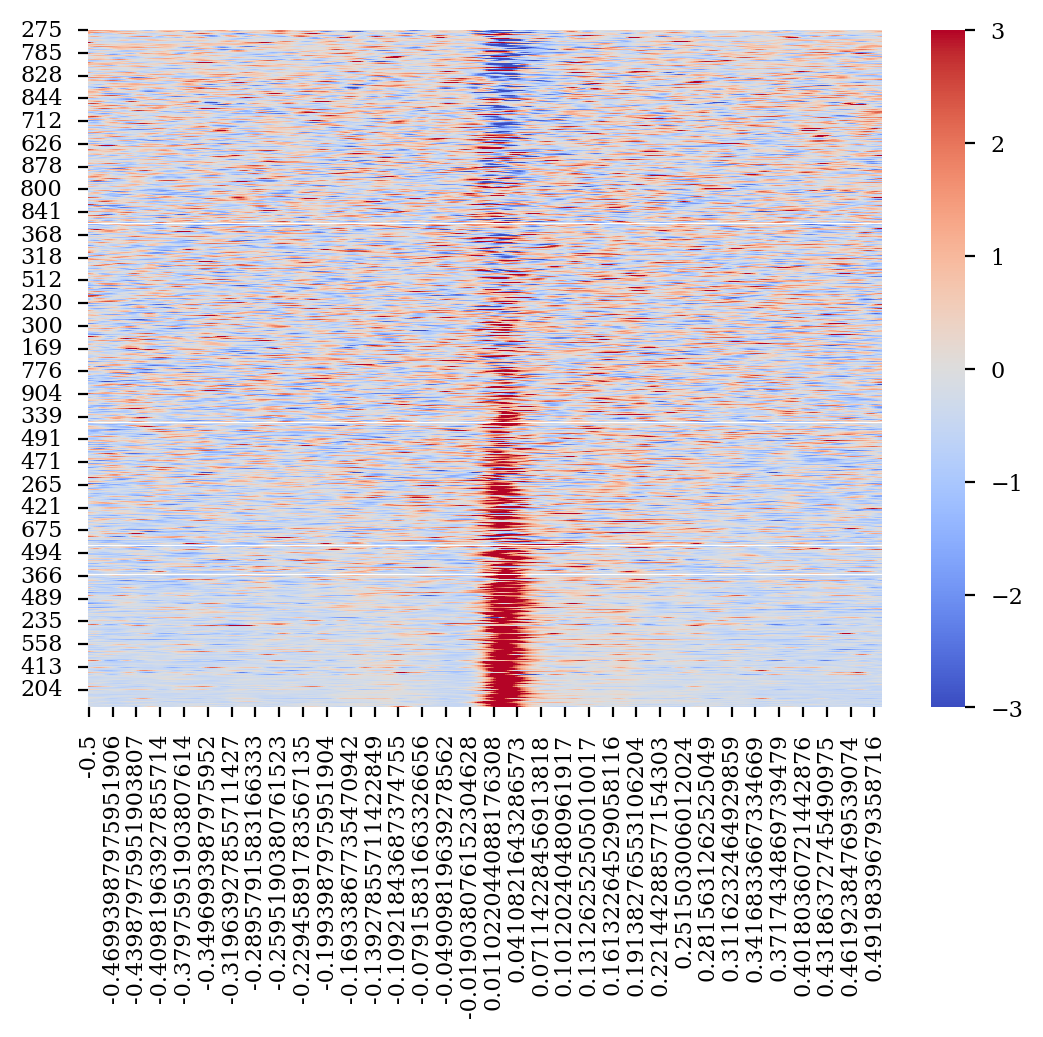

In [163]:
sort_idx = np.argsort(results_df.response)
sns.heatmap(peth_zscore.iloc[:, sort_idx].T,vmax=3,vmin=-3,cmap="coolwarm")

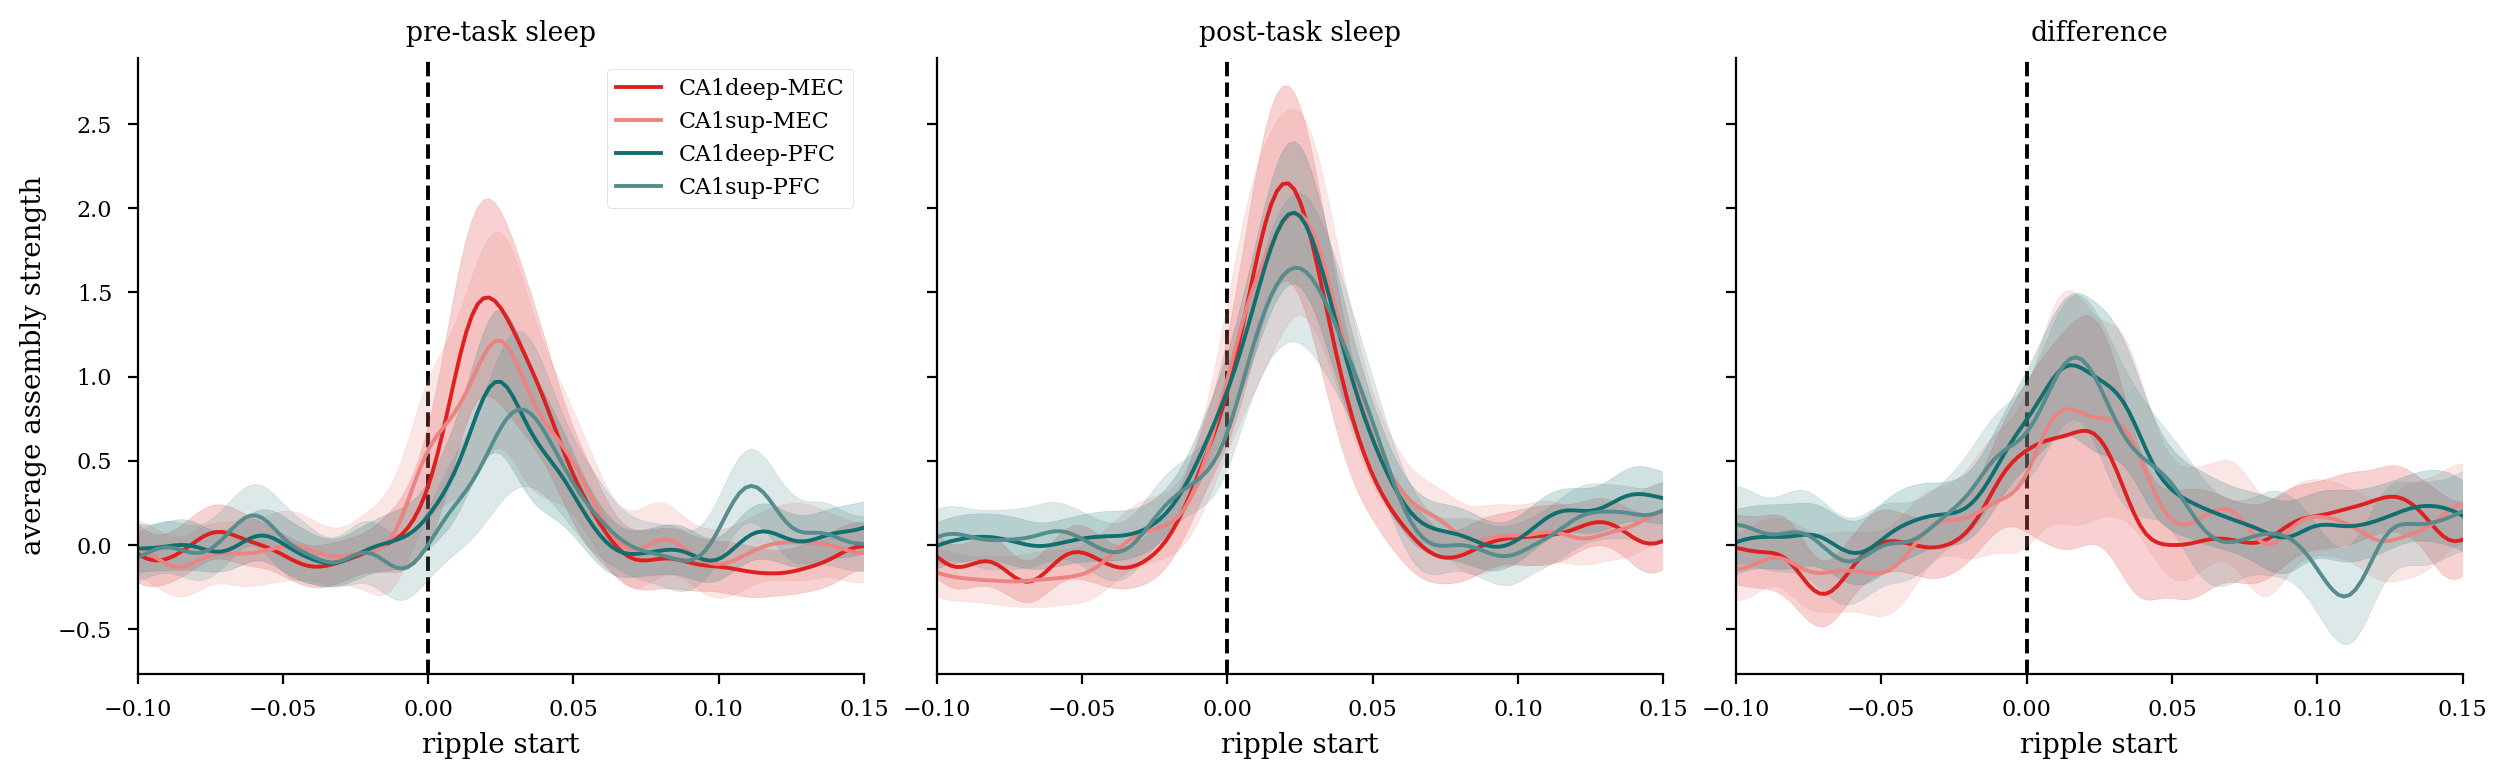

In [164]:
def plot_this(
    peth, pre_idx, post_idx, cross_region_label, cross_region_idx, group_colors, ax
):
    ax[0].plot(
        peth.index,
        peth.iloc[:, pre_idx & cross_region_idx].mean(axis=1),
        color=group_colors[cross_region_label],
        label=cross_region_label,
    )
    lower, upper = functions.confidence_intervals(
        peth.iloc[:, pre_idx & cross_region_idx].values.T
    )
    ax[0].fill_between(
        peth.index, lower, upper, color=group_colors[cross_region_label], alpha=0.2
    )

    ax[1].plot(
        peth.index,
        peth.iloc[:, post_idx & cross_region_idx].mean(axis=1),
        color=group_colors[cross_region_label],
    )
    lower, upper = functions.confidence_intervals(
        peth.iloc[:, post_idx & cross_region_idx].values.T
    )
    ax[1].fill_between(
        peth.index, lower, upper, color=group_colors[cross_region_label], alpha=0.2
    )

    ax[2].plot(
        peth.index,
        peth.iloc[:, post_idx & cross_region_idx].mean(axis=1).values
        - peth.iloc[:, pre_idx & cross_region_idx].mean(axis=1).values,
        color=group_colors[cross_region_label],
    )
    lower, upper = functions.confidence_intervals(
            (peth.iloc[:, post_idx & cross_region_idx].values - peth.iloc[:, pre_idx & cross_region_idx].values).T
    )
    ax[2].fill_between(
        peth.index, lower, upper, color=group_colors[cross_region_label], alpha=0.2
    )

group_colors = {
    "CA1deep-MEC": "#de2020",
    "CA1sup-MEC": "#eb8383",
    "CA1deep-PFC": "#116f70",
    "CA1sup-PFC": "#568c8c",
}
sns.set_palette(sns.color_palette(group_colors.values()))

titles = ["pre-task sleep", "post-task sleep", "difference"]

fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.subplots_adjust(hspace=0.00, wspace=0.1)
ax = ax.ravel()

pre_idx = (results_df.epoch == "pre").values
post_idx = (results_df.epoch == "post").values
deep_mec_idx = (results_df.cross_region_label == "CA1deep-MEC").values
sup_mec_idx = (results_df.cross_region_label == "CA1sup-MEC").values
deep_pfc_idx = (results_df.cross_region_label == "CA1deep-PFC").values
sup_pfc_idx = (results_df.cross_region_label == "CA1sup-PFC").values


plot_this(peth_zscore, pre_idx, post_idx, "CA1deep-MEC", deep_mec_idx, group_colors, ax)
plot_this(peth_zscore, pre_idx, post_idx, "CA1sup-MEC", sup_mec_idx, group_colors, ax)
plot_this(peth_zscore, pre_idx, post_idx, "CA1deep-PFC", deep_pfc_idx, group_colors, ax)
plot_this(peth_zscore, pre_idx, post_idx, "CA1sup-PFC", sup_pfc_idx, group_colors, ax)
ax[0].legend()
sns.despine()
ax[0].set_ylabel("average assembly strength")

for i, title in enumerate(titles):
    ax[i].set_title(title)
    ax[i].set_xlim(-0.1, 0.15)
    ax[i].set_xlabel("ripple start")
    ax[i].axvline(0, color="k", linestyle="--", zorder=-100)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_CA1deep-PFC vs. 1_CA1sup-PFC: Mann-Whitney-Wilcoxon test two-sided, P_val:2.104e-01 U_stat=8.883e+03
1_CA1deep-MEC vs. 1_CA1sup-MEC: Mann-Whitney-Wilcoxon test two-sided, P_val:8.234e-01 U_stat=4.765e+03


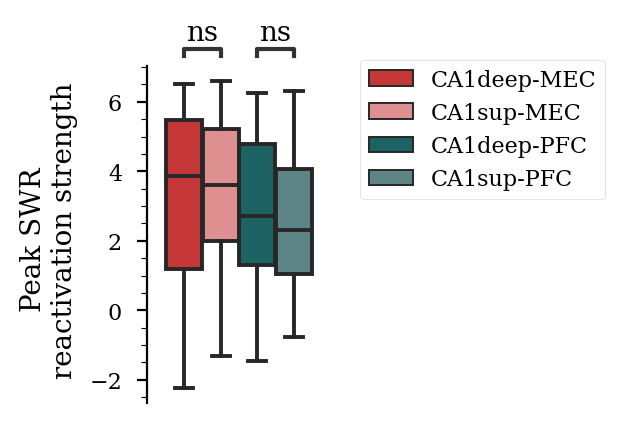

In [166]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
results_df["constant"] = 1
sns.boxplot(
    y="response_50ms_peak_zscore",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
    data=results_df.query("epoch=='post'"),
    showfliers=False,
)
plt.ylabel("Peak SWR \n reactivation strength")

ax = plt.gca()
sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.legend(bbox_to_anchor=(1.1, 1.05))

ax.axes.get_xaxis().set_ticks([])
ax.spines["bottom"].set_visible(False)
ax.set_xlabel("")
# ax.legend("")

box_pairs = [
    ((1, "CA1deep-MEC"),(1, "CA1sup-MEC")),
    ((1, "CA1deep-PFC"),(1, "CA1sup-PFC"))
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=results_df.query("epoch=='post'"),
    y="response_50ms_peak_zscore",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()
plt.show()

In [137]:
results_df

,response,assembly_n,epoch,deepSuperficial,cross_region_label,n_ca1,n_cortex,n_ca1_total,n_cortex_total,n_cells_total,basepath,response_50ms,response_50ms_peak,response_50ms_zscore,response_50ms_peak_zscore,constant
0,0.083057,0,pre,Superficial,CA1sup-MEC,1,3,1,10,11,Z:\Data\AYAold\AYA7\day19,0.131824,0.196796,2.828127,4.574413,1
1,-0.026461,0,post,Superficial,CA1sup-MEC,1,3,1,10,11,Z:\Data\AYAold\AYA7\day19,-0.008467,-0.000896,-0.259120,-0.185338,1
2,-0.058819,0,pre,Deep,CA1deep-MEC,1,4,18,38,56,Z:\Data\AYAold\AYA7\day20,-0.085686,-0.017077,-1.705395,-0.098870,1
3,0.107454,0,post,Deep,CA1deep-MEC,1,4,18,38,56,Z:\Data\AYAold\AYA7\day20,0.131375,0.219917,1.183898,2.385367,1
4,0.115712,0,pre,Deep,CA1deep-MEC,2,14,19,50,69,Z:\Data\AYAold\AYA7\day24,0.127620,0.210349,0.676802,2.416339,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,-0.383753,1,pre,Deep,CA1deep-PFC,3,6,14,16,30,Z:\Data\ORproject\OR18\day2,-0.680181,-0.249107,-3.590849,-0.721278,1
910,0.503076,0,post,Deep,CA1deep-PFC,2,2,14,16,30,Z:\Data\ORproject\OR18\day2,0.857009,1.258494,3.918136,6.042820,1
911,0.145846,1,post,Deep,CA1deep-PFC,3,6,14,16,30,Z:\Data\ORproject\OR18\day2,0.253120,0.328100,2.908530,3.898354,1
912,0.223385,0,pre,Superficial,CA1sup-PFC,1,3,3,16,19,Z:\Data\ORproject\OR18\day2,0.439219,0.711374,3.249140,5.642825,1


In [167]:
def ratio(a, b):
    return (a - b) / (a + b)

results_df_pivot = results_df.pivot(
    index=["basepath", "assembly_n", "cross_region_label"],
    columns="epoch",
    values=["response","response_50ms","response_50ms_peak","response_50ms_zscore","response_50ms_peak_zscore"],
).reset_index()
results_df_pivot.columns = results_df_pivot.columns.map('_'.join).str.strip('_')
results_df_pivot["constant"] = 1
results_df_pivot["(post-pre)/(post+pre)"] = ratio(results_df_pivot.response_50ms_peak_zscore_post + 100, results_df_pivot.response_50ms_peak_zscore_pre + 100)
# results_df_pivot["(post-pre)"] = results_df_pivot.post - results_df_pivot.pre

results_df_pivot

,basepath,assembly_n,cross_region_label,response_post,response_pre,response_50ms_post,response_50ms_pre,response_50ms_peak_post,response_50ms_peak_pre,response_50ms_zscore_post,response_50ms_zscore_pre,response_50ms_peak_zscore_post,response_50ms_peak_zscore_pre,constant,(post-pre)/(post+pre)
0,Z:\Data\AYAold\AYA7\day19,0,CA1sup-MEC,-0.026461,0.083057,-0.008467,0.131824,-0.000896,0.196796,-0.259120,2.828127,-0.185338,4.574413,1,-0.023288
1,Z:\Data\AYAold\AYA7\day20,0,CA1deep-MEC,0.107454,-0.058819,0.131375,-0.085686,0.219917,-0.017077,1.183898,-1.705395,2.385367,-0.098870,1,0.012281
2,Z:\Data\AYAold\AYA7\day24,0,CA1deep-MEC,0.053573,0.115712,0.049132,0.127620,0.133015,0.210349,-1.202213,0.676802,-0.025546,2.416339,1,-0.012065
3,Z:\Data\AYAold\AYA7\day24,1,CA1deep-MEC,1.408646,0.908836,2.439546,1.462802,3.788211,2.210770,3.898382,3.917158,6.390782,6.338514,1,0.000246
4,Z:\Data\AYAold\AYA7\day24,2,CA1deep-MEC,2.336720,2.198872,4.191273,3.840169,6.248854,5.861058,3.955089,3.889887,6.201339,6.272370,1,-0.000334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Z:\Data\Kenji\ec016.577_590,3,CA1deep-MEC,-0.164286,-0.032506,-0.259077,0.021278,-0.087504,0.072256,-3.270439,0.615449,-0.993379,1.790529,1,-0.013864
458,Z:\Data\Kenji\ec016.577_590,3,CA1sup-MEC,0.679524,0.173230,1.029263,0.402774,1.517643,0.777152,3.266692,2.972181,5.202340,6.130542,1,-0.004392
459,Z:\Data\ORproject\OR18\day2,0,CA1deep-PFC,0.503076,0.982748,0.857009,1.515111,1.258494,1.875986,3.918136,3.721175,6.042820,4.831948,1,0.005742
460,Z:\Data\ORproject\OR18\day2,0,CA1sup-PFC,0.146341,0.223385,0.154100,0.439219,0.187496,0.711374,0.827870,3.249140,1.496962,5.642825,1,-0.020015


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_CA1deep-PFC vs. 1_CA1sup-PFC: Mann-Whitney-Wilcoxon test two-sided, P_val:7.788e-01 U_stat=7.973e+03
1_CA1deep-MEC vs. 1_CA1sup-MEC: Mann-Whitney-Wilcoxon test two-sided, P_val:3.201e-01 U_stat=4.454e+03


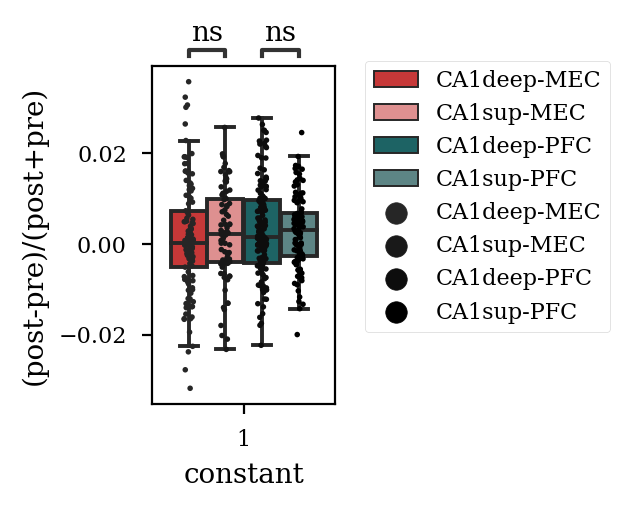

In [172]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
results_df["constant"] = 1
sns.boxplot(
    y="(post-pre)/(post+pre)",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
    data=results_df_pivot,
    showfliers=False,
)
sns.stripplot(
    y="(post-pre)/(post+pre)",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
    data=results_df_pivot,
    dodge=True,
    color="k",
    s=2
)
plt.legend(bbox_to_anchor=(1.1, 1.05))

box_pairs = [
    ((1, "CA1deep-MEC"),(1, "CA1sup-MEC")),
    ((1, "CA1deep-PFC"),(1, "CA1sup-PFC"))
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=results_df_pivot,
    y="(post-pre)/(post+pre)",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()
plt.show()